<a href="https://colab.research.google.com/github/doogzultz/time_series_project/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from pandas.plotting import scatter_matrix
from tensorflow.keras.layers import Layer, Dense, Dropout, Input, Flatten, Concatenate, Conv1D, LSTM, Bidirectional, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.utils import shuffle
from sklearn.compose import ColumnTransformer
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [8]:
url = "https://raw.githubusercontent.com/doogzultz/time_series_project/main/data.csv"
data = pd.read_csv(url)

In [9]:
data.shape

(32202, 16)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32202 entries, 0 to 32201
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              32202 non-null  object 
 1   identifier        32202 non-null  object 
 2   market_cap        32202 non-null  float64
 3   sector            32202 non-null  int64  
 4   index_membership  32202 non-null  bool   
 5   factor_1          32202 non-null  float64
 6   factor_2          32202 non-null  float64
 7   factor_3          32202 non-null  float64
 8   factor_4          32202 non-null  float64
 9   factor_5          32202 non-null  float64
 10  factor_6          32202 non-null  float64
 11  factor_7          32202 non-null  float64
 12  factor_8          32202 non-null  float64
 13  factor_9          32202 non-null  float64
 14  factor_10         32202 non-null  float64
 15  target            32202 non-null  float64
dtypes: bool(1), float64(12), int64(1), objec

In [11]:
data.head(5)

date    identifier    market_cap  sector  index_membership  factor_1  \
0  2010-01-06  PEOLTD6JT1H8  7.190555e+09      40              True  0.542152   
1  2010-01-06  CU207TQ2XDV5  5.857240e+08      35              True  0.220381   
2  2010-01-06  DKHPXAJKWEJ4  2.233829e+09      40              True  0.213919   
3  2010-01-06  LSJW0IUKSGL4  9.037927e+09      40              True  0.324657   
4  2010-01-06  BL42ED83CIW5  6.268824e+09      50              True  0.751834   

   factor_2  factor_3  factor_4  factor_5  factor_6  factor_7  factor_8  \
0 -0.000300  0.301775  0.393536  0.099153  0.316418  0.897486  0.472729   
1 -0.000084  0.712309  0.398954  0.420881  0.502019  0.017691  0.590987   
2 -0.000055  0.869317  0.928662  0.741415  0.630970  0.397990  0.552974   
3  0.000211  0.492034  0.411192  0.582819  0.028141  0.845029  0.963876   
4 -0.000054  0.448101  0.663682  0.992310  0.805440  0.168199  0.528944   

   factor_9  factor_10    target  
0 -0.000500   0.577285 -0.001568  
1 -0.000160   0.227243 -0.000364  
2 -0.000399   0.187541 -0.000357  
3  0.000154   0.928168  0.000482  
4 -0.000031   0.150358 -0.000030

In [12]:
data.tail(5)

date    identifier    market_cap  sector  index_membership  \
32197  2011-12-28  NAL0VSQAS2E1  2.187961e+09      20              True   
32198  2011-12-28  GTQACAQEX0S7  6.630383e+09      55              True   
32199  2011-12-28  THIOIJGJYVY6  6.236588e+09      10              True   
32200  2011-12-28  RSWIUCJ9P7E9  1.129460e+10      30              True   
32201  2011-12-28  LI0DOWMAPJI3  5.186957e+09      50              True   

       factor_1  factor_2  factor_3  factor_4  factor_5  factor_6  factor_7  \
32197  0.059488 -0.000665  0.443405  0.057153  0.669305  0.917963  0.593669   
32198  0.546955 -0.005255  0.860117  0.096773  0.882369  0.745993  0.261197   
32199  0.796562  0.000176  0.637660  0.093420  0.901992  0.623066  0.404097   
32200  0.952059  0.000002  0.916464  0.496177  0.473402  0.273621  0.153440   
32201  0.176597 -0.000149  0.123162  0.705973  0.579434  0.433761  0.378818   

       factor_8  factor_9  factor_10    target  
32197  0.501561 -0.000669   0.366823 -0.000425  
32198  0.592820 -0.008829   0.240491 -0.012405  
32199  0.947511  0.002690   0.904231  0.001832  
32200  0.576355  0.000002   0.739407  0.000010  
32201  0.547389 -0.000188   0.126069 -0.000030

In [42]:
ident_counts = data.value_counts('identifier')
ident_counts

identifier
AD41WBQFVG43    104
UZ4DWDZ8ALZ4    104
KR47536Y10D4    104
KPJ8FTV9ESJ3    104
KMHQ727PU8E2    104
               ... 
PNUM57CYEB27      5
KHKNKSMXBWP3      5
LYCPQJ19AOY0      5
RENR64FT3I74      5
LALJLSN9UMP2      2
Length: 356, dtype: int64

In [14]:
sector_counts = data.value_counts('sector')
sector_counts

sector
40    7497
20    6715
25    4278
15    3000
30    2343
55    2307
45    1664
10    1585
35    1578
50    1235
dtype: int64

In [15]:
date_counts = data.value_counts('date', sort = False).sort_index()
date_counts.values

array([318, 318, 318, 318, 318, 315, 315, 315, 315, 315, 315, 315, 315,
       315, 314, 314, 314, 314, 313, 313, 313, 313, 313, 314, 314, 314,
       315, 315, 315, 315, 315, 310, 310, 310, 310, 310, 310, 310, 310,
       310, 310, 310, 311, 311, 312, 312, 312, 312, 312, 312, 312, 312,
       312, 311, 311, 312, 313, 308, 308, 308, 308, 307, 307, 306, 306,
       306, 306, 306, 306, 306, 306, 306, 306, 307, 307, 307, 306, 306,
       307, 307, 307, 307, 307, 306, 306, 306, 305, 305, 305, 305, 305,
       305, 305, 305, 305, 305, 301, 301, 301, 301, 301, 301, 302, 302])

In [16]:
data[data['identifier']=='RSWIUCJ9P7E9']

date    identifier    market_cap  sector  index_membership  \
314    2010-01-06  RSWIUCJ9P7E9  5.586090e+09      30              True   
632    2010-01-13  RSWIUCJ9P7E9  5.612948e+09      30              True   
950    2010-01-20  RSWIUCJ9P7E9  2.584786e+09      30              True   
1268   2010-01-27  RSWIUCJ9P7E9  3.642624e+09      30              True   
1586   2010-02-03  RSWIUCJ9P7E9  2.802871e+09      30              True   
...           ...           ...           ...     ...               ...   
30994  2011-11-30  RSWIUCJ9P7E9  8.862862e+09      30              True   
31295  2011-12-07  RSWIUCJ9P7E9  5.478549e+09      30              True   
31596  2011-12-14  RSWIUCJ9P7E9  6.510951e+09      30              True   
31898  2011-12-21  RSWIUCJ9P7E9  9.854136e+09      30              True   
32200  2011-12-28  RSWIUCJ9P7E9  1.129460e+10      30              True   

       factor_1  factor_2  factor_3  factor_4  factor_5  factor_6  factor_7  \
314    0.573497 -0.000010  0.311169  0.980402  0.138643  0.670161  0.175300   
632    0.972337 -0.011665  0.659413  0.390766  0.490170  0.934403  0.553632   
950    0.510286 -0.000002  0.854287  0.863874  0.838484  0.285102  0.688229   
1268   0.632091  0.003014  0.517924  0.049229  0.822227  0.921584  0.652747   
1586   0.741697  0.000878  0.059535  0.672592  0.336475  0.532181  0.188407   
...         ...       ...       ...       ...       ...       ...       ...   
30994  0.851359 -0.000001  0.405306  0.641692  0.761667  0.238151  0.574747   
31295  0.538740 -0.000087  0.650622  0.680546  0.282191  0.213483  0.526022   
31596  0.162621  0.005967  0.322420  0.664807  0.885370  0.172689  0.855860   
31898  0.502853 -0.000020  0.656526  0.438561  0.000083  0.326129  0.936588   
32200  0.952059  0.000002  0.916464  0.496177  0.473402  0.273621  0.153440   

       factor_8      factor_9  factor_10    target  
314    0.313468 -2.508012e-05   0.268870 -0.000004  
632    0.580866 -3.484005e-03   0.596030 -0.005494  
950    0.100377 -1.258147e-05   0.297399 -0.000023  
1268   0.175835  1.920353e-03   0.964792  0.002045  
1586   0.467556  6.249934e-04   0.365064  0.000687  
...         ...           ...        ...       ...  
30994  0.046580 -6.379665e-07   0.231870 -0.000001  
31295  0.132180 -2.092617e-05   0.522439 -0.000304  
31596  0.133556  6.979498e-03   0.232222  0.004391  
31898  0.613506 -1.247193e-05   0.925480 -0.000013  
32200  0.576355  1.504836e-06   0.739407  0.000010  

[104 rows x 16 columns]

In [17]:
data.value_counts('index_membership')

index_membership
True    32202
dtype: int64

In [18]:
data = data.drop(columns = 'index_membership')

In [19]:
data.describe()

market_cap        sector      factor_1      factor_2      factor_3  \
count  3.220200e+04  32202.000000  32202.000000  3.220200e+04  32202.000000   
mean   1.095296e+10     30.774952      0.498756 -1.462113e-04      0.500189   
std    1.572001e+10     12.667972      0.288787  5.759326e-03      0.289240   
min   -4.825453e+08     10.000000      0.000066 -1.545644e-01      0.000063   
25%    2.505520e+09     20.000000      0.249074 -3.602127e-04      0.246556   
50%    4.884047e+09     30.000000      0.496954  8.698222e-07      0.502099   
75%    1.151506e+10     40.000000      0.748845  3.912393e-04      0.752583   
max    1.534334e+11     55.000000      0.999972  8.053847e-02      0.999993   

           factor_4      factor_5      factor_6      factor_7      factor_8  \
count  32202.000000  32202.000000  32202.000000  3.220200e+04  32202.000000   
mean       0.498953      0.500697      0.499683  4.981013e-01      0.498162   
std        0.288920      0.288964      0.288080  2.875331e-01      0.289374   
min        0.000076      0.000056      0.000050  3.547287e-07      0.000034   
25%        0.251858      0.250038      0.251288  2.507394e-01      0.248211   
50%        0.496547      0.501924      0.496901  4.953077e-01      0.495810   
75%        0.749778      0.750799      0.748982  7.454329e-01      0.748112   
max        0.999992      0.999937      0.999943  9.999425e-01      0.999990   

           factor_9     factor_10        target  
count  3.220200e+04  32202.000000  3.220200e+04  
mean  -1.756859e-04      0.498593 -1.844661e-04  
std    6.064242e-03      0.287299  5.914170e-03  
min   -1.945520e-01      0.000023 -1.669913e-01  
25%   -3.680745e-04      0.251549 -3.533136e-04  
50%    9.016693e-07      0.495600  8.821662e-07  
75%    3.857279e-04      0.748538  3.900145e-04  
max    1.045811e-01      0.999971  8.577309e-02

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f950db77a50>,
      dtype=object)

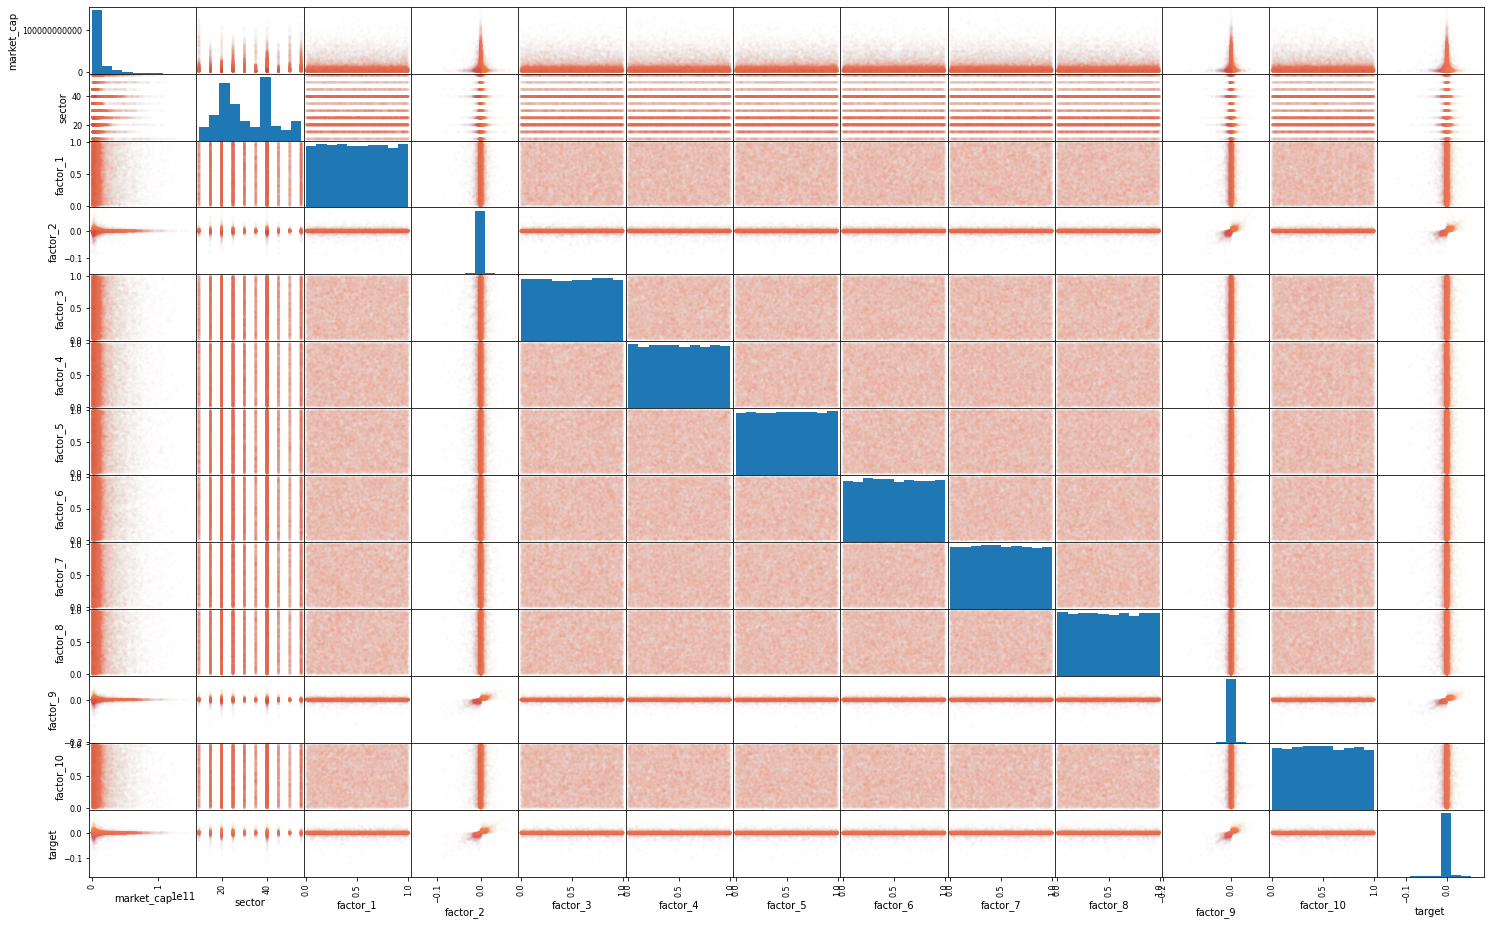

In [21]:
scatter_matrix(data.iloc[:,0:15], cmap = 'plasma', c = data['target'],alpha = .01, figsize=(25, 16))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f950a2c04d0>,
      dtype=object)

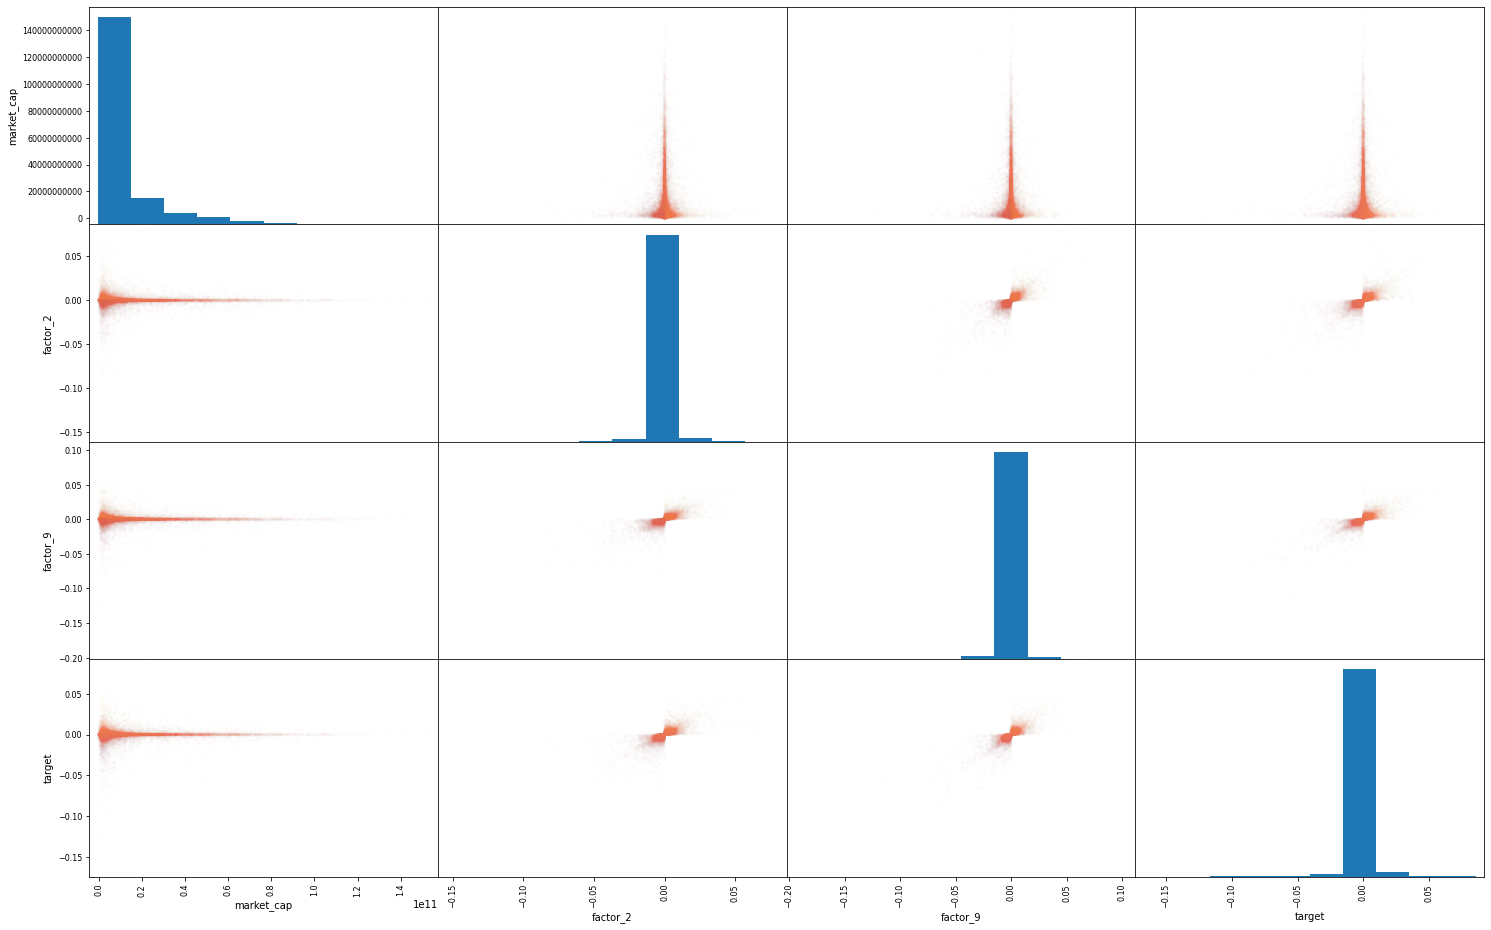

In [22]:
scatter_matrix(data[['market_cap', 'factor_2', 'factor_9', 'target' ]], cmap = 'plasma', c = data['target'],alpha = .01, figsize=(25, 16))

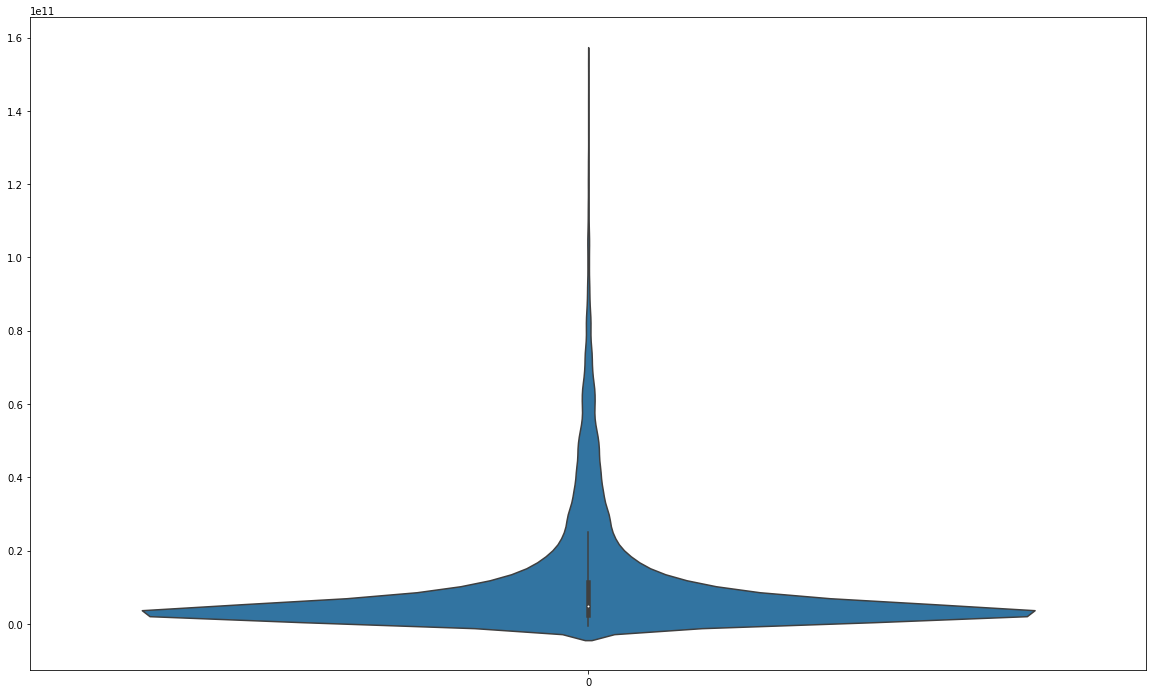

In [35]:
plt.figure(figsize = (20,12))
sns.violinplot(data = data['market_cap'])

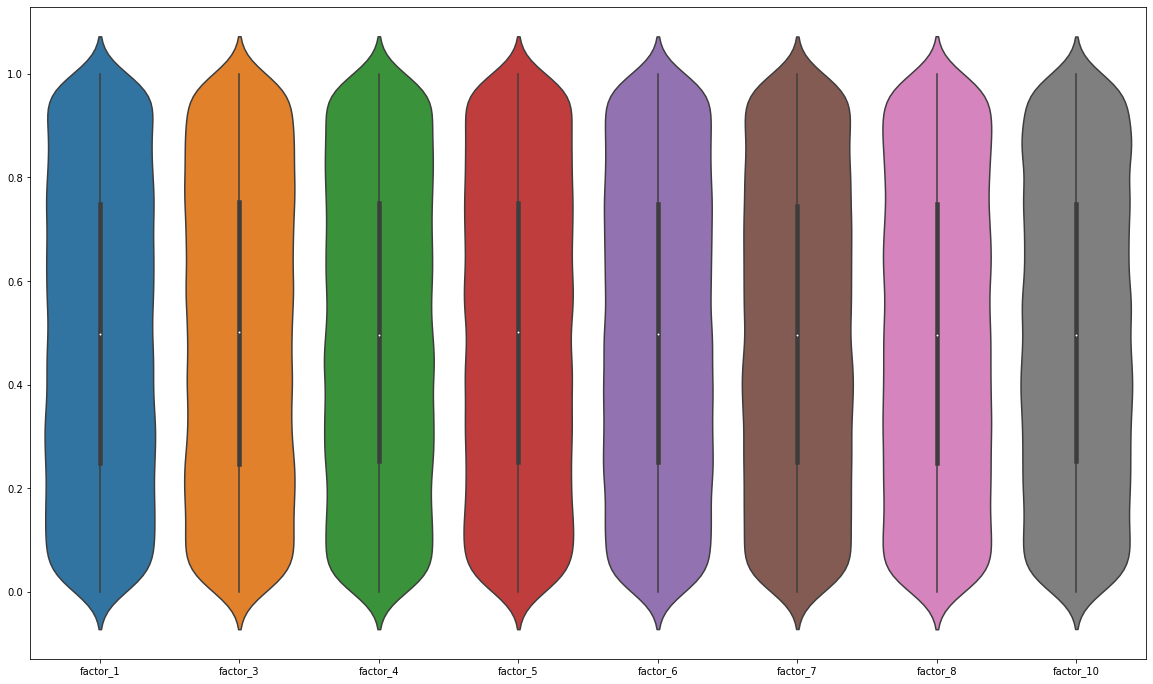

In [40]:
plt.figure(figsize = (20,12))
sns.violinplot(data = data.iloc[:, [4,6,7,8,9,10,11,13]])

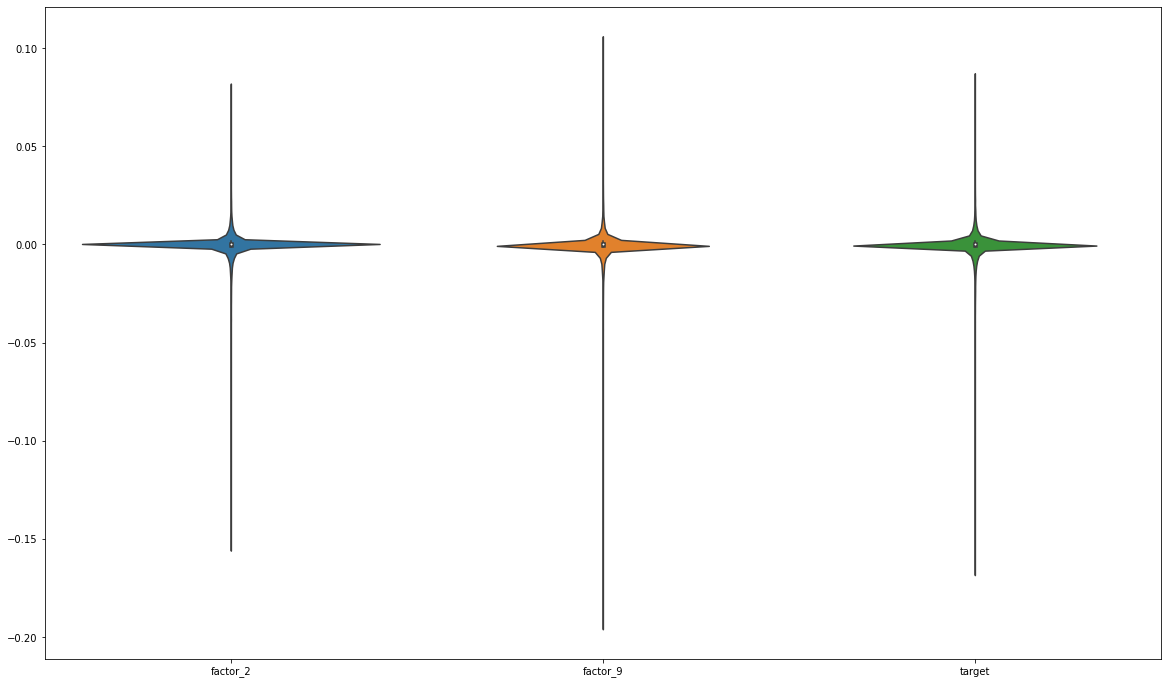

In [37]:
plt.figure(figsize = (20,12))
sns.violinplot(data = data[['factor_2', 'factor_9', 'target']])

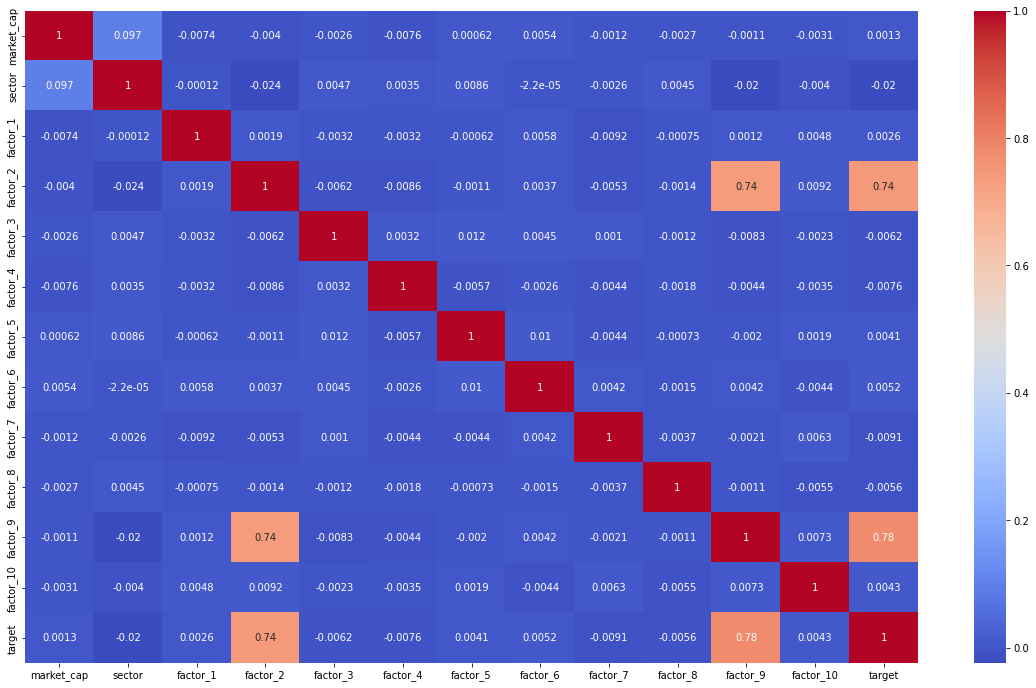

In [41]:
plt.figure(figsize = (20,12))
heatmap = sns.heatmap(data.corr(), cmap="coolwarm", annot=True)

In [66]:
data['date'].index

RangeIndex(start=0, stop=32202, step=1)

In [163]:
def firm_analysis(n, t_ahead):
  # 0<= n <= 355
  # t_ahead is number of steps ahead we wish to analyse
  firm = ident_counts.index[n]
  d_firm = data[(data['identifier'] == firm)].sort_values('date')
  weeks = [value for value, date in enumerate(d_firm['date'])]
  plt.figure(figsize = (20,12))
  sns.lineplot(x = weeks, y = 'target', data = d_firm)
  plt.figure(figsize = (20,12))
  sns.violinplot(data = d_firm[['market_cap']])
  plt.figure(figsize = (20,12))
  sns.violinplot(data = d_firm.iloc[:, [4,6,7,8,9,10,11,13]])
  plt.figure(figsize = (20,12))
  sns.violinplot(data = d_firm[['factor_2', 'factor_9', 'target']])
  plt.figure(figsize = (20,12))
  sns.heatmap(d_firm.corr(), cmap="coolwarm", annot=True)
  scatter_matrix(d_firm.iloc[:,0:15], cmap = 'plasma', c = d_firm['target'],alpha = .5, figsize=(25, 16))
  scatter_matrix(d_firm[['factor_2', 'factor_9', 'target' ]], cmap = 'plasma', c = d_firm['target'],alpha = .5, figsize=(20, 12))
  if t_ahead > 0:
    d_firm_shifted = d_firm.iloc[:-t_ahead]
    s = len(d_firm_shifted.index)
    for t in range(t_ahead):
      target_firm = d_firm[['target']][t+1:s+t+1]
      d_firm_shifted[str(t+1)] = target_firm.values
  else:
    d_firm_shifted = d_firm
  plt.figure(figsize = (20,12))
  shift_corr = d_firm_shifted.corr()
  sns.heatmap(shift_corr.iloc[:,12:], cmap="coolwarm", annot=True)
  sns.pairplot(d_firm_shifted, x_vars = d_firm_shifted.iloc[:,14:].columns)
  #scatter_matrix(d_firm_shifted.iloc[:,0:15], cmap = 'plasma', c = d_firm['target'],alpha = .5, figsize=(25, 16))
  return d_firm_shifted


 

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 50.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 50.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 50.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

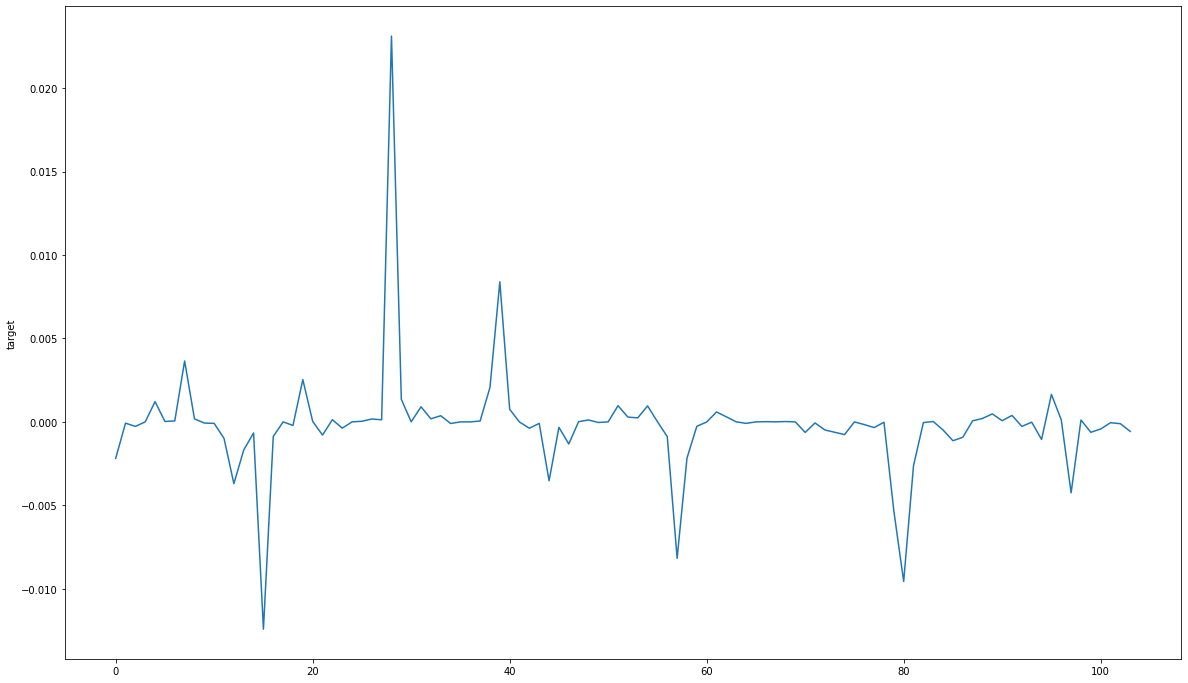

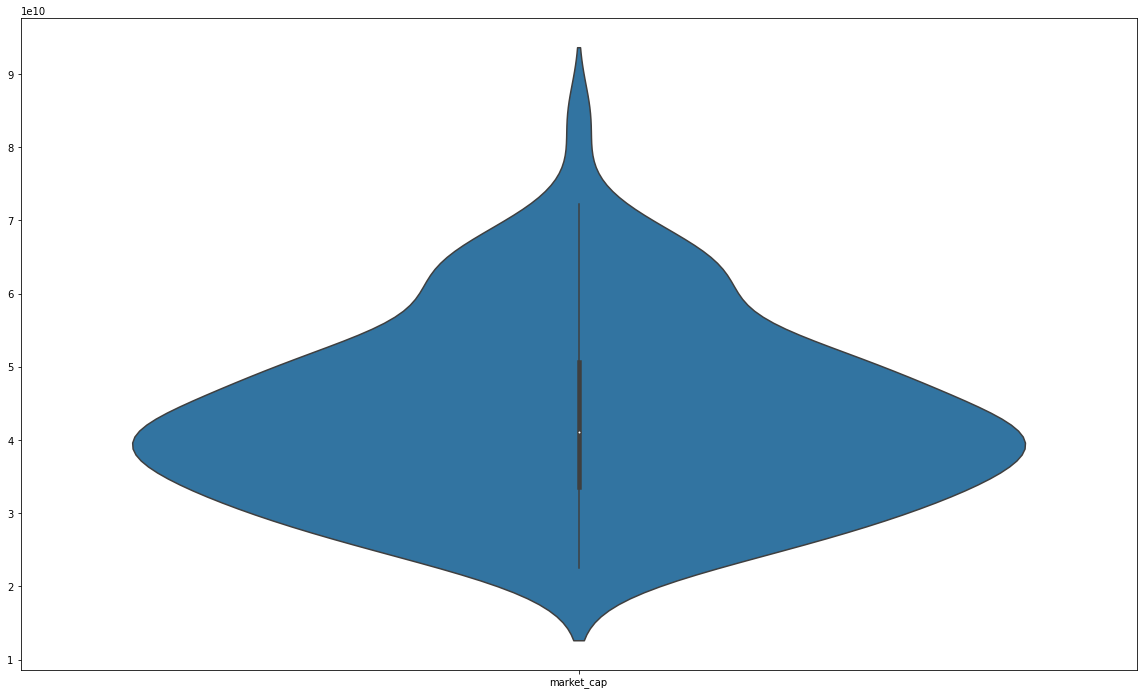

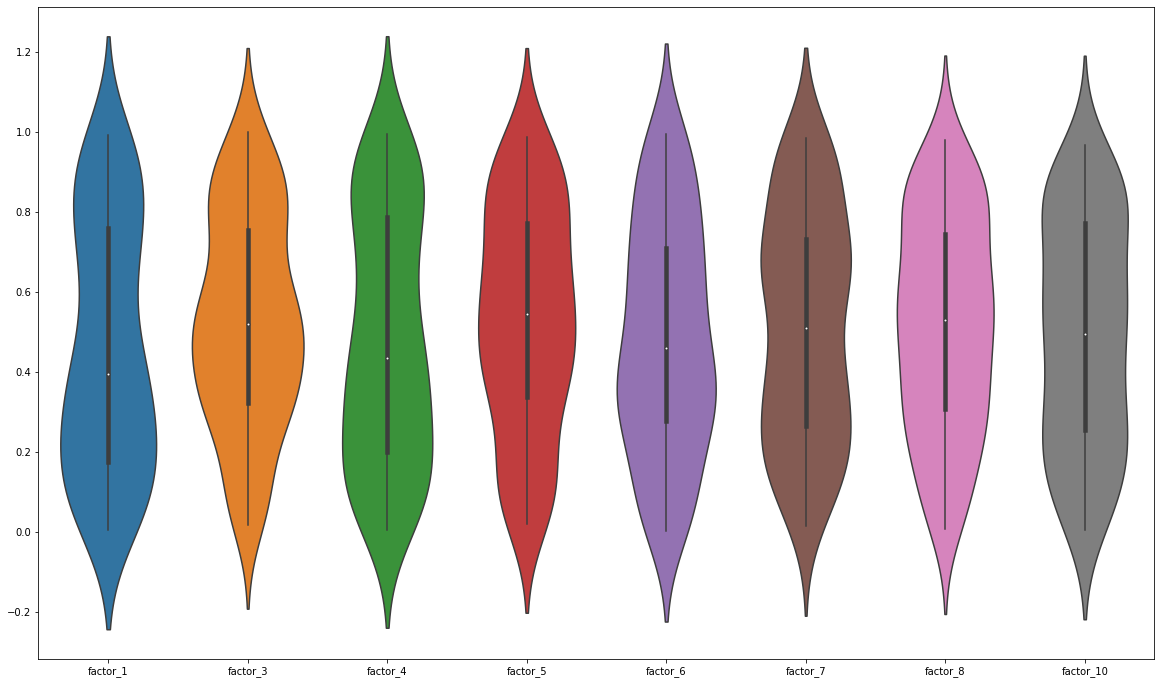

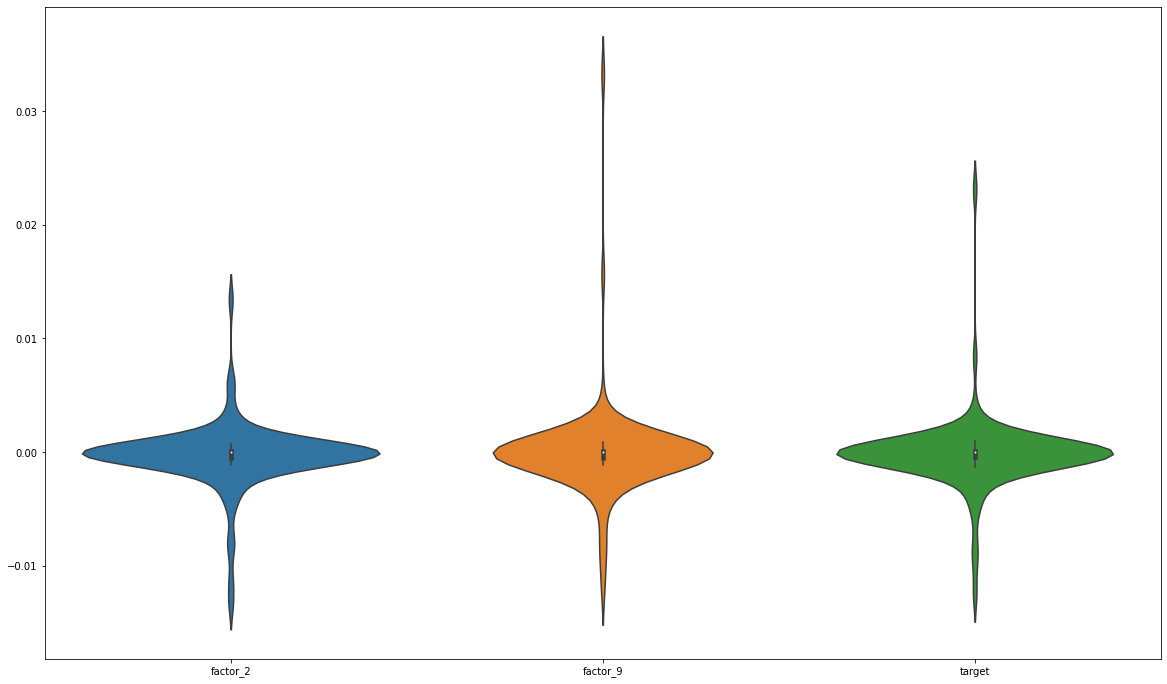

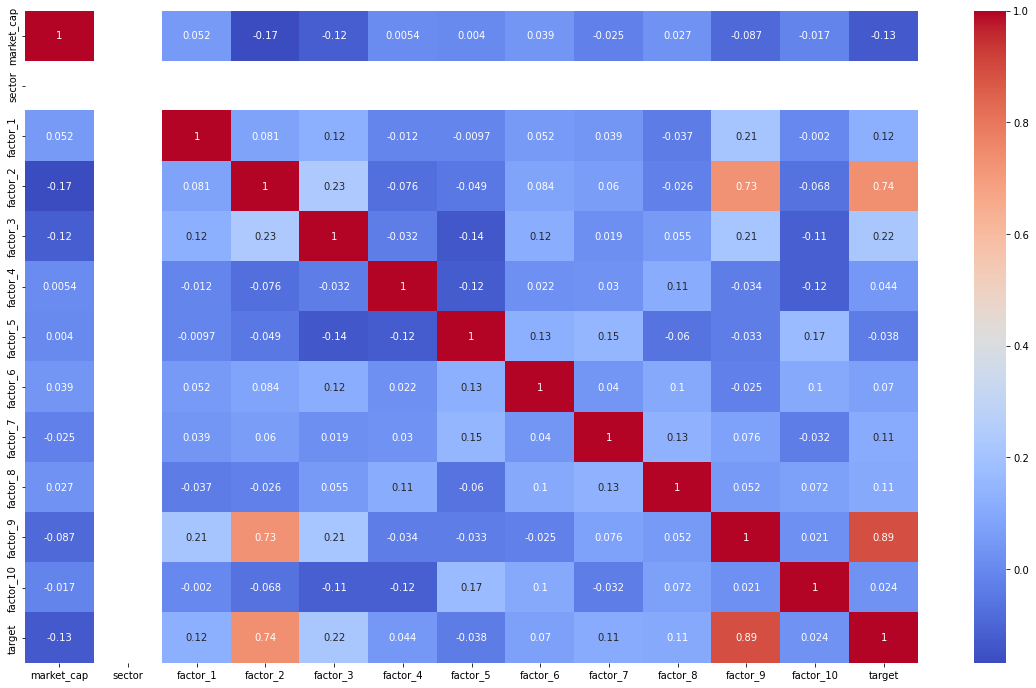

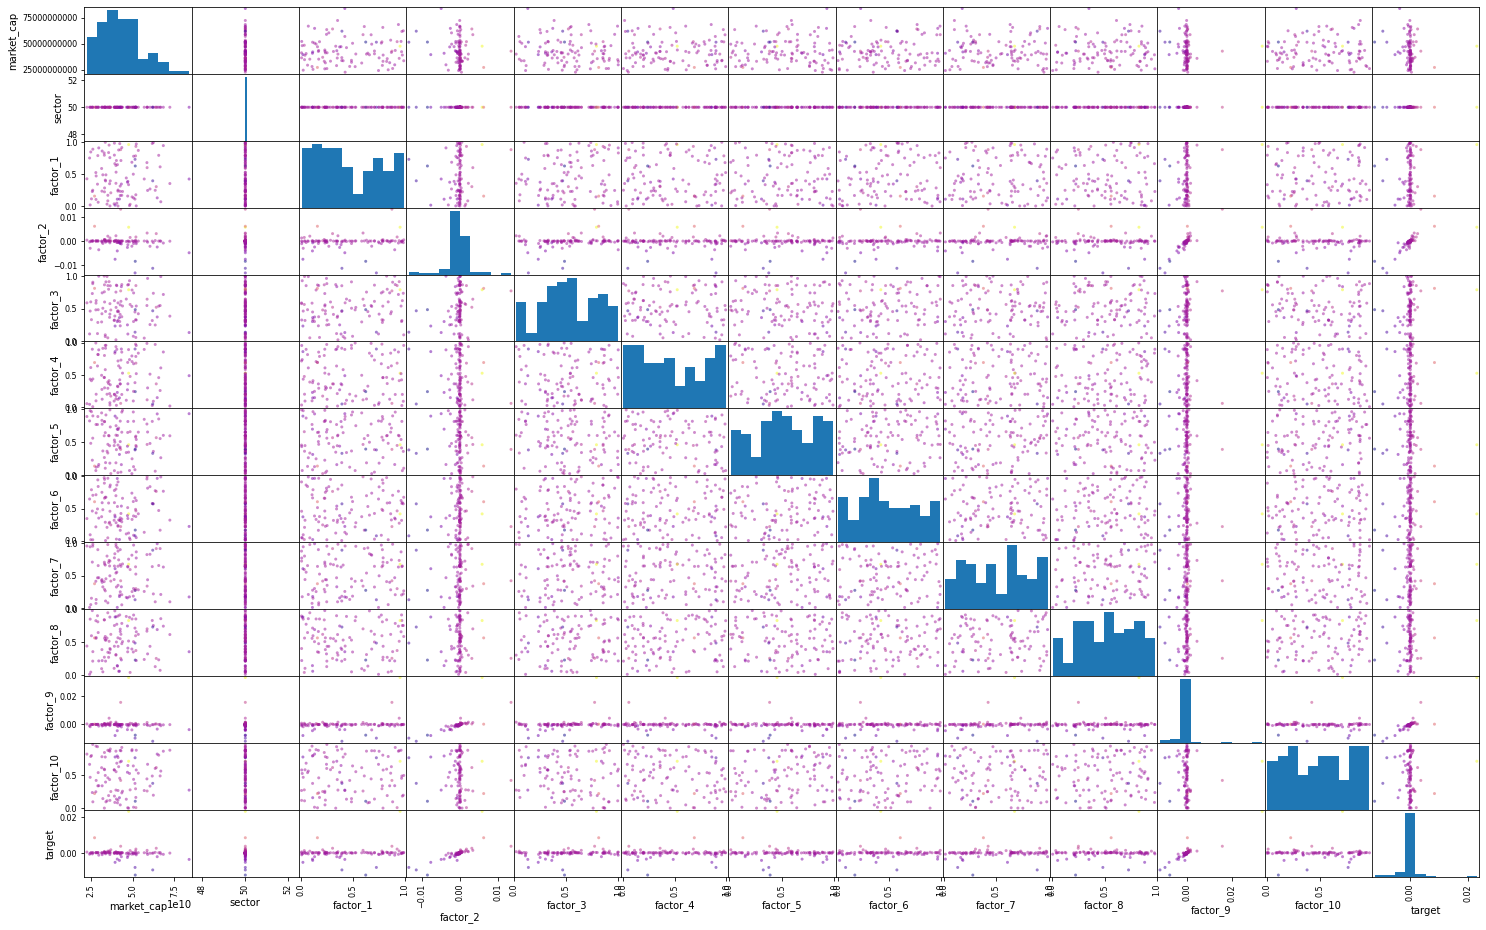

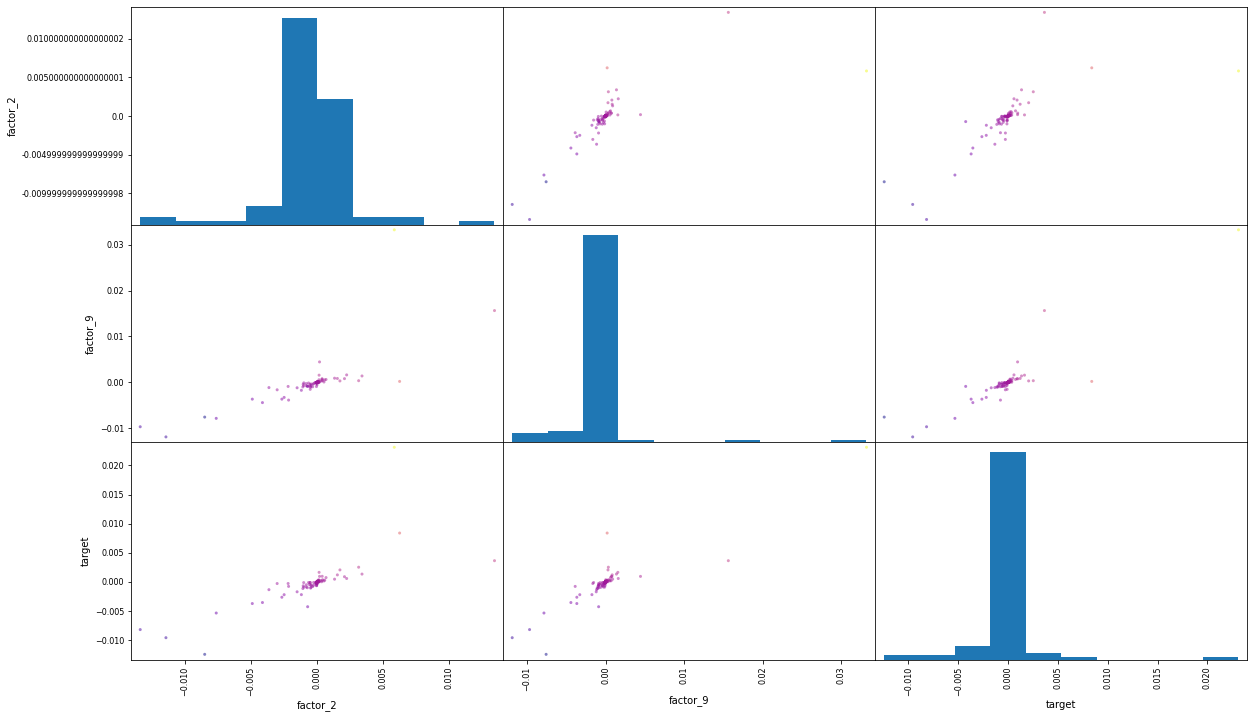

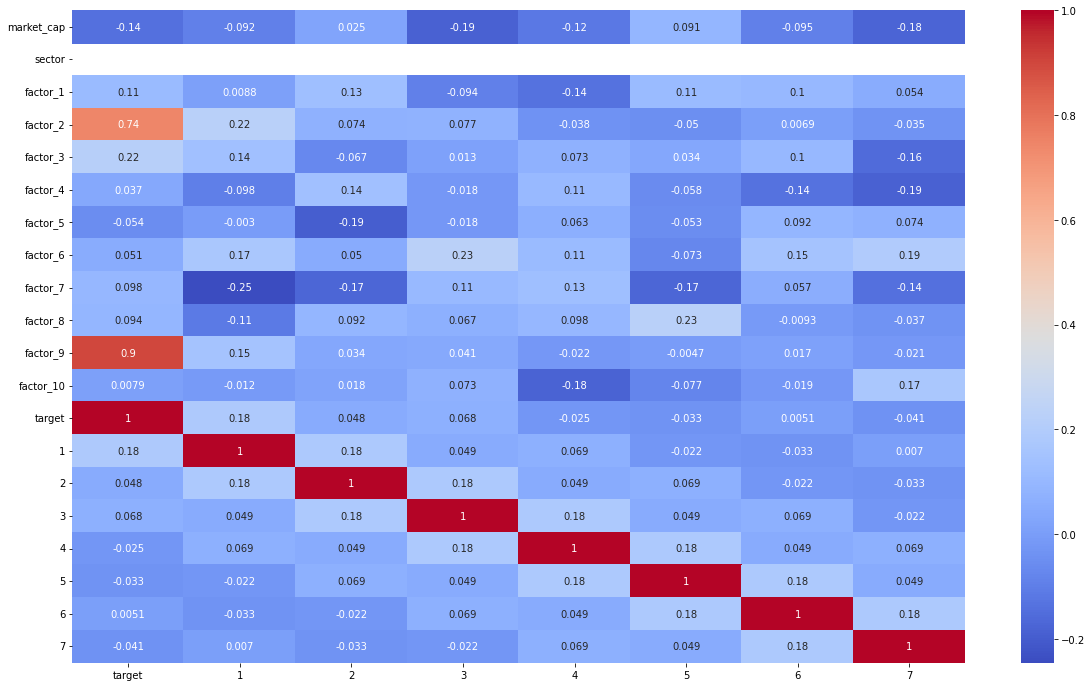

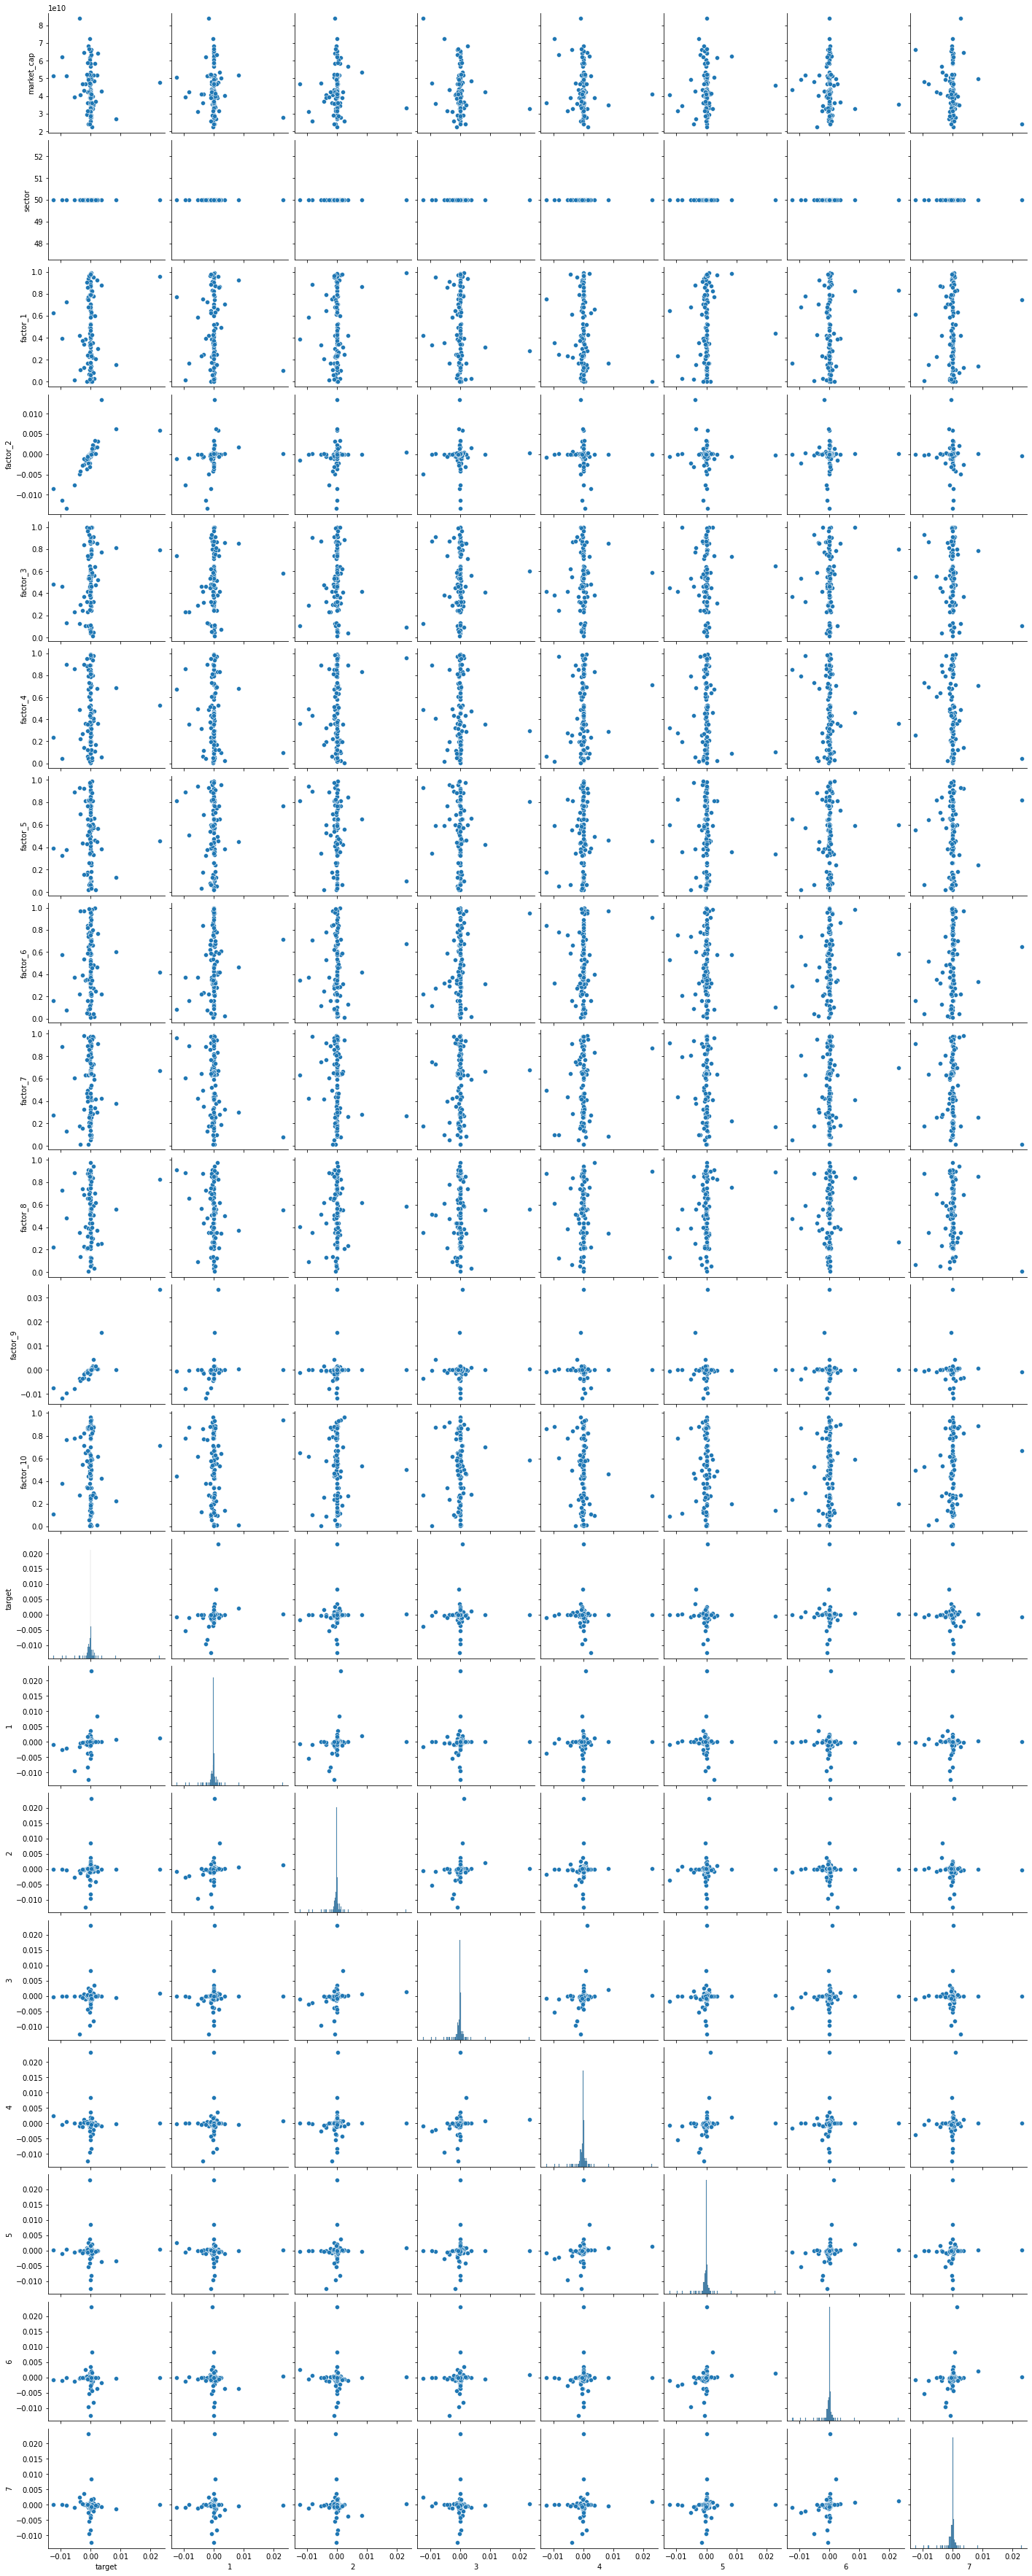

In [164]:
d_firm_63_shifted = firm_analysis(63, 7)